In [34]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");

v3.0
v4.0


In [7]:
Pe = 7.5
# file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/TP/Pe=$(Pe).jld2"
# data = Dict{String,Any}()
# @pack! data = X,Y,Z,outline
# safesave(file_name,data)

file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/TP/Pe=$(Pe).jld2"
data = load(file_name)
@unpack outline = data

Dict{String, Any} with 4 entries:
  "Y"       => [5.0 0.0 … 0.0 0.0; 5.0 5.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.…
  "Z"       => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.…
  "X"       => [0.0 0.0 … 0.0 6.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.…
  "outline" => Any[[0.29, 0.31], [0.27, 0.29], [0.21, 0.18], [0.22, 0.22], [0.2…

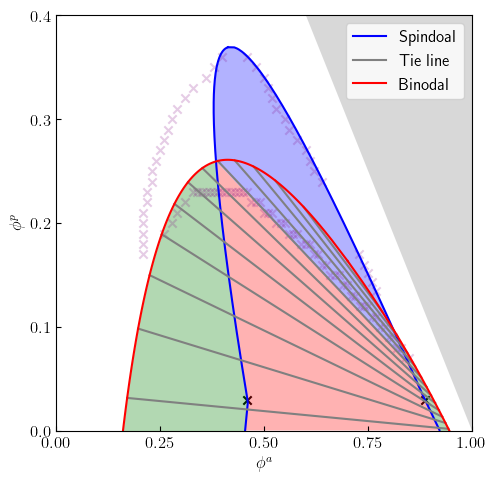

In [12]:
# plot tp
v0 = 7.5
using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(5,5))
v0 = 7.5
plot_phase(fig, ax, v0, 12; Lxs = [], Δϕ = 0.001)

for v in outline
    ϕa, ϕp = v[1], v[2]
    ax.scatter(ϕa,ϕp; marker = "x", color = "purple", alpha = 0.2)
end

# left 1:20
# bottom 21:77
# right 78:end

display(fig)

In [5]:
left_out = [x.+[-0.005,0.005] for x in sort(outline[1:20]; by= x->x[2])];
top_out = [[0.41,0.37],[0.42,0.37],[0.43,0.37],[0.44,0.37],[0.45,0.37]];
right_out = [x.+[0.005, 0.005] for x in sort(outline[78:end]; by= x->x[1])];
bottom_out = [x.- [0.00, 0.005] for x in sort(outline[21:77]; by= x->x[1], rev = true)];
print(bottom_out)

[[0.85, 0.065], [0.84, 0.065], [0.83, 0.075], [0.82, 0.075], [0.81, 0.08499999999999999], [0.8, 0.08499999999999999], [0.79, 0.095], [0.78, 0.095], [0.77, 0.105], [0.76, 0.105], [0.75, 0.11499999999999999], [0.74, 0.11499999999999999], [0.73, 0.11499999999999999], [0.72, 0.125], [0.71, 0.125], [0.7, 0.135], [0.69, 0.135], [0.68, 0.145], [0.67, 0.145], [0.66, 0.145], [0.65, 0.155], [0.64, 0.155], [0.63, 0.165], [0.62, 0.165], [0.61, 0.175], [0.6, 0.175], [0.59, 0.175], [0.58, 0.185], [0.57, 0.185], [0.56, 0.185], [0.55, 0.195], [0.54, 0.195], [0.53, 0.195], [0.52, 0.205], [0.51, 0.205], [0.5, 0.205], [0.49, 0.215], [0.48, 0.215], [0.47, 0.215], [0.46, 0.225], [0.45, 0.225], [0.44, 0.225], [0.43, 0.225], [0.42, 0.225], [0.41, 0.225], [0.4, 0.225], [0.39, 0.225], [0.38, 0.225], [0.37, 0.225], [0.36, 0.225], [0.35, 0.225], [0.34, 0.225], [0.33, 0.225], [0.31, 0.215], [0.29, 0.205], [0.28, 0.195], [0.26, 0.185]]

In [11]:
X = hcat(left_out...,top_out...,right_out...,bottom_out...,left_out[1])

2×101 Matrix{Float64}:
 0.205  0.205  0.205  0.205  0.205  …  0.31   0.29   0.28   0.26   0.205
 0.175  0.185  0.195  0.205  0.215     0.215  0.205  0.195  0.185  0.175

In [16]:
using SciPy
#create spline function
f, u = SciPy.interpolate.splprep(X, s=0.001, per=true)
#create interpolated lists of points
xint, yint = SciPy.interpolate.splev( 0.:.001:1.,f)

ax.plot(xint, yint; color = "purple", linestyle = "--")
# display(fig)

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f02641fd850>

In [17]:
min_x = minimum(xint)
max_x = maximum(xint)

dx = (max_x-min_x)/100
xs = min_x:dx:max_x

g(t) = SciPy.interpolate.splev(t,f)[1][1]
ts = hcat([find_zeros(y->(g(y)-x),(0,1)) for x in xs]...)

h(t) = SciPy.interpolate.splev(t,f)[2][1]
ax.fill_between(xs,h.(ts[1,:]),h.(ts[2,:]), color = "purple", alpha = 0.3, linewidth = 0)


PyObject <matplotlib.collections.PolyCollection object at 0x7f02642b0e50>

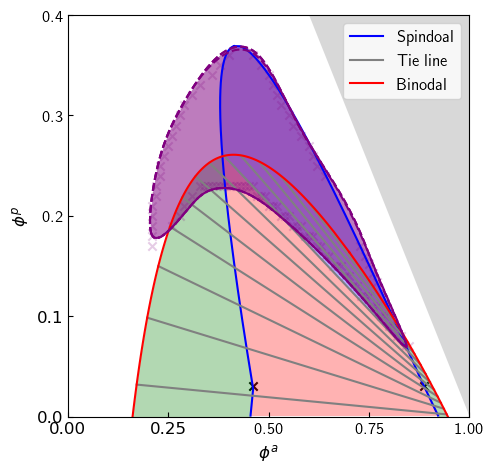

In [18]:
display(fig)

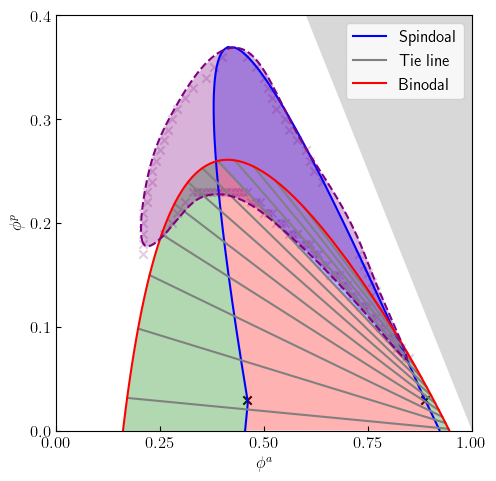

In [13]:
using SciPy

function add_TP(fig,ax; Pe = 7.5)
    Pe = 7.5
    file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/TP/Pe=$(Pe).jld2"
    data = load(file_name)
    @unpack outline = data

    left_out = [x.+[-0.005,0.005] for x in sort(outline[1:20]; by= x->x[2])];
    top_out = [[0.41,0.37],[0.42,0.37],[0.43,0.37],[0.44,0.37],[0.45,0.37]];
    right_out = [x.+[0.005, 0.005] for x in sort(outline[78:end]; by= x->x[1])];
    bottom_out = [x.- [0.00, 0.005] for x in sort(outline[21:77]; by= x->x[1], rev = true)];

    X = hcat(left_out...,top_out...,right_out...,bottom_out...,left_out[1])
    #create spline function
    f, u = SciPy.interpolate.splprep(X, s=0.001, per=true)
    #create interpolated lists of points
    xint, yint = SciPy.interpolate.splev( 0.:.001:1.,f)

    ax.plot(xint, yint; color = "purple", linestyle = "--")
    
    min_x = minimum(xint)
    max_x = maximum(xint)

    dx = (max_x-min_x)/100
    xs = min_x:dx:max_x

    g(t) = SciPy.interpolate.splev(t,f)[1][1]
    ts = hcat([find_zeros(y->(g(y)-x),(0,1)) for x in xs]...)

    h(t) = SciPy.interpolate.splev(t,f)[2][1]
    ax.fill_between(xs,h.(ts[1,:]),h.(ts[2,:]), color = "purple", alpha = 0.3, linewidth = 0)

    return fig,ax
end

add_TP(fig,ax; Pe = 7.5)
display(fig)

In [3]:
Pe, Δϕ = 7.5, 0.001
file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/spinodal/Δϕ=$(Δϕ)_Pe=$(Pe).jld2"
data = load(file_name)
@unpack ϕas_left, ϕas_right, ϕps, indl, indr = data

Dict{String, Any} with 5 entries:
  "indr"      => 28
  "indl"      => 28
  "ϕas_right" => [0.92205, 0.92087, 0.919689, 0.918507, 0.917325, 0.916141, 0.9…
  "ϕps"       => [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009…
  "ϕas_left"  => [0.454915, 0.455146, 0.455377, 0.45561, 0.455844, 0.456079, 0.…

In [6]:
f(x) = is_stable_value(x, 0.0; Pe = Pe)
ϕal, ϕar = find_zeros(f,(1e-8,1-1e-8))


2-element Vector{Float64}:
 0.4546851642931568
 0.9232291954752846

In [ ]:
pushfirst!(ϕas_left, ϕal)
pushfirst!(ϕas_right, ϕar)
pushfirst!(ϕps, 0.0)

In [8]:
            file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/spinodal/Δϕ=$(Δϕ)_Pe=$(Pe).jld2"
            data = Dict{String,Any}()
            @pack! data = ϕas_left, ϕas_right, ϕps, indl, indr
            safesave(file_name,data)

In [36]:
Pe = 5.0
ϕp = 0.03
f(x) = is_stable_value(x, ϕp; Pe = Pe)
# ϕal, ϕar = find_zeros(f,(0.1,1-ϕp-1e-10))
f(0.1), f(0.6), f(1-ϕp-1e-10)

(-8.563390527662969e-5, 0.0416214972006524, -1.0000466942570614e-10)

In [ ]:
Pe = 5.0
Δϕ = 0.001
filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
data = wload(filename)
@unpack Pe, γs, ϕ1s, ϕ2s = data
ϕas_left, ϕas_right, ϕps = return_spin(;Pe = Pe, Δϕ = Δϕ, ϕp_max = 0.08)
max_ϕa = maximum(ϕas_left)
max_ϕp = maximum(ϕps)
ϕas_left, ϕas_right, ϕps, γ_grid, ϕ1_grid, ϕ2_grid = return_spin_from_grid("binodal_1_$(Δϕ)_$(Pe)";max_ϕa = max_ϕa, Pe = Pe, γ_grid = γs, ϕ1_grid = ϕ1s, ϕ2_grid = ϕ2s, ϕp_grid = gammas_converter_p(γs, ϕ1s).+0.00001)
ϕas_left, ϕas_right, ϕps, γ_grid, ϕ1_grid, ϕ2_grid = return_spin_from_grid("binodal_2_$(Δϕ)_$(Pe)";max_ϕa = max_ϕa, Pe = Pe, γ_grid = γs, ϕ1_grid = ϕ1s, ϕ2_grid = ϕ2s, ϕp_grid = gammas_converter_p(γs, ϕ2s).+0.00001)
                    

                    